## Сортировка слиянием

	Вход: массив A[1. . .n]. 
	Выход: перестановка A′[1. . .n] элементов массива A[1. . .n], в которой элементы упорядочены понеубыванию: A′[1]≤A′[2]≤...≤A′[n].

Простая сортировка вставкой работает O(n2). Слиянием - O(nlogn).

Процедура InsertionSort(A[1. . .n]) 
	для i от 2 до n:
		j←i 
		пока j>1 и A[j]<A[j−1]:
			обменять A[j] и A[j−1]
			j←j−1

Процедура MergeSort(A, ℓ,r) 
	если ℓ <r:
		m← ⌊ℓ+r2⌋
		Merge(MergeSort(A, ℓ,m), MergeSort(A,m+1,r))

Можно убрать рекурсию использую очередь:
Функция IterativeMergeSort(A[1. . .n])
	Q←[ ] {пустая очередь} 
	для i от 1 до n: 
		PushBack(Q,[A[i]])
	пока|Q|>1:
		PushBack(Q,Merge(PopFront(Q),PopFront(Q)))
	вернутьPopFront(Q)



## Задача на программирование: число инверсий

Первая строка содержит число 1≤n≤10\^5, вторая — массив A[1…n], содержащий натуральные числа, не превосходящие 10\^9. Необходимо посчитать число пар индексов 1≤i<j≤n  , для которых A[i]>A[j]. (Такая пара элементов называется инверсией массива. Количество инверсий в массиве является в некотором смысле его мерой неупорядоченности: например, в упорядоченном по неубыванию массиве инверсий нет вообще, а в массиве, упорядоченном по убыванию, инверсию образуют каждые два элемента.)

In [1]:
INPUTS = """5
1 2 3 5 4"""

In [2]:
# O(n2) не проходит по времени, нужно mergesort
n = int(INPUTS.split('\n')[0])
A = list(map(int, INPUTS.split('\n')[1].split()))

def inversions(a):  
    count = 0
    for i in range(len(a)):
        for j in range(i+1, len(a)):
            if a[i] > a[j]:
                count += 1
    return count

inversions(A)

1

In [3]:
import random
from heapq import heapify, heappush, heappop

invs = 0

def merge(L, R):
    global invs
    C = [0] * (len(L) + len(R))
    n = m = k = 0
    while n < len(L) and m < len(R):
        if L[n] <= R[m]:
            C[k] = L[n]
            n += 1
        else:
            C[k] = R[m]
            invs += len(L) - n
            m += 1
        k += 1
    while n < len(L):
        C[k] = L[n]; n += 1; k += 1
    while m < len(R):
        C[k] = R[m]; m += 1; k += 1
    return C

def mergeSort(a):
    if len(a) > 1:
        m = len(a) // 2
        return merge( mergeSort(a[0:m]), mergeSort(a[m:]) )
    else:
        return a

def iterativeMergeSort(a):
    Q = []
    heapify(Q)
    for i in range(len(a)):
        heappush(Q, [a[i]])
    while len(Q) > 1:
        heappush(Q, merge(heappop(Q), heappop(Q)))
    return heappop(Q)

def test():
    N = 999
    M = 1000
    a = sorted([random.randint(-N, 5*N) for x in range(N)])
    b = sorted([random.randint(-N, 5*M) for x in range(M)])
    c = merge(a, b)
    assert c == sorted(a + b)
    
    shuffled = c.copy()
    random.shuffle(shuffled)
    assert c == mergeSort(shuffled)
    
    shuffled = c.copy()
    random.shuffle(shuffled)
    assert c == iterativeMergeSort(shuffled)

test()


In [4]:
def mergeInversions(a):
    INVERSIONS = 0
    
    def merge(L, R):
        nonlocal INVERSIONS
        C = [0] * (len(L) + len(R))
        n = m = k = 0
        while n < len(L) and m < len(R):
            if L[n] <= R[m]:
                C[k] = L[n]
                n += 1
            else:
                C[k] = R[m]
                INVERSIONS += len(L) - n
                m += 1
            k += 1
        while n < len(L):
            C[k] = L[n]; n += 1; k += 1
        while m < len(R):
            C[k] = R[m]; m += 1; k += 1
        return C

    def mergeSort(a):
        if len(a) > 1:
            m = len(a) // 2
            return merge( mergeSort(a[0:m]), mergeSort(a[m:]) )
        else:
            return a
    
    mergeSort(a)
    return INVERSIONS

def test():
    N = 1000
    A = [random.randint(1, 5*N) for x in range(N)]
    assert inversions(A) == mergeInversions(A)

test()


# Быстрая сортировка

Функция QuickSort(A, ℓ,r)  

	еслиℓ≥r:   	
		вернуть  
	m←Partition(A, ℓ,r)  
	QuickSort(A, ℓ,m−1)  
	QuickSort(A,m+1,r)  


Partition находит такое место для элемента x, чтобы справа были больше него, а слева - меньше. При этом если в хвосте так не получается, то подтягивает элементы в левую сторону. Обычно за х берется первый элемент, индекс двигается вперед, пока за ним меньшие элементы, затем, те которые впедели больше х. Которые больше x меняются местами с разделителем и индекс увеличивается на 1.

Улучшает обычно использование случайного разделителя.

Функция Partition(A, ℓ,r)  
	x←A[ℓ]  
	j←ℓ  
	для i от ℓ+1 до r:   
		если A[i]≤x:  
			j←j+1  
			обменять A[j] и A[i]  
	обменять A[ℓ] и A[j]  
	вернуть j  


Элиминация хвостовой рекурсии  
Процедура QuickSort(A, ℓ,r)  
	пока ℓ <r:   
		m←Partition(A, ℓ,r)  
		QuickSort(A, ℓ,m−1)  
		ℓ←m+1  

Элиминируя рекурсивный вызов для более длинного массива, мы гарантируем, что глубина рекурсии (а значит,и дополнительная память) будет в худшем случае не более O(logn).

Интроспективная сортировка: O(nlogn)в худшем случае  
1. запускает быструю сортировку с простой эвристикойвыбора разделителя (например, медиана из первого,среднего и последнего элементов)  
2. если глубина рекурсии превышает порог clogn,быстрая сортировка прерывается и запускается алгоритм с гарантированным временем O(nlogn) в худшем случае (например, сортировка кучей)


partLow (partitioning test) PASSED
partHigh (partitioning test) PASSED
partHoar (partitioning test) PASSED
partBentley (partitioning test) PASSED
partLow (sorting test) PASSED
partHigh (sorting test) PASSED
partHoar (sorting test) PASSED
partBentley (sorting test) PASSED
qSortBentley (sorting test) PASSED


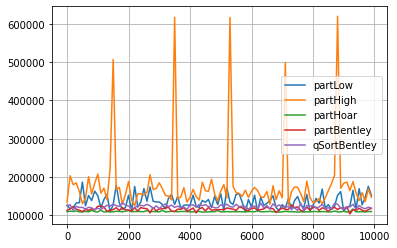

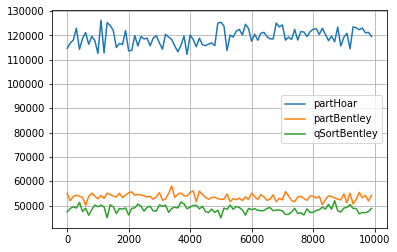

In [5]:
def pivot(A, l, r):
    m = (l + r) // 2
    if A[m] < A[l]:
        A[l], A[m] = A[m], A[l]
    if A[r] < A[l]:
        A[l], A[r] = A[r], A[l]
    if A[m] < A[r]:
        A[r], A[m] = A[m], A[r]
    return A[r]


def partLow(A, l, r):
    # базовый учебный вариант (берем первый эл-т)
    q = A[l]
    j = l
    for i in range(l+1, r+1):
        if A[i] <= q:
            j += 1
            A[j], A[i] = A[i], A[j]
    A[l], A[j] = A[j], A[l]
    return j if j<r else j-1


def partHigh(A, l, r):
    # разбиение Ломуто (берем последний эл-т)
    q = A[r]
    j = l
    for i in range(l, r):
        if A[i] <= q:
            A[j], A[i] = A[i], A[j]
            j += 1
    A[r], A[j] = A[j], A[r]
    return j if j<r else j-1


def partHoar(A, l, r, putQ=False, left=False, right=False):
    # разбиение Хоара (максимум слева <= минимум справа)
    q = putQ if not (putQ is False) else pivot(A, l, r)
    i = l
    j = r
    while True:
        while (A[i] < q) if not left else ((A[i] == q) and (i < r)):
            i += 1
        while (A[j] > q) if not right else ((A[j] >= q) and (j > l)):
            j -= 1
        if i >= j:
            return j    # j-й это последний, который меньше q
        A[i], A[j] = A[j], A[i]
        i += 1
        j -= 1
        
def partBentley(A, l, r):
    # Бентли-Макилрой (1993)
    q = pivot(A, l, r)
    m = partHoar(A, l, r, putQ=q)
    m1 = partHoar(A, l, m, putQ=q, right=True)
    m2 = partHoar(A, m+1, r, putQ=q, left=True)

    return m1, m2

def quickSort(A, partition=partLow):
    
    def _qSort(A, l, r):
        # канон, но не подходит для Бентли
        while l < r:
            m = partition(A, l, r)
            _qSort(A, l, m)
            l = m + 1 
    
    def _qSort2(A, l, r):
        if l < r:
            m1, m2 = partition(A, l, r)
            _qSort2(A, l, m1)
            _qSort2(A, m2 + 1, r)

    if partition.__name__ == "partBentley":
        _qSort2(A, 0, len(A)-1)
    else:
        _qSort(A, 0, len(A)-1)


def qSortBentley(A):
    # Бентли-Макилрой (1993)
    # требует O(n) дополнительной памяти
    if len(A) <= 1:
        return A
    else:
        pivot = random.choice(A)
        L = [x for x in A if x < pivot]
        E = [x for x in A if x == pivot]
        R = [x for x in A if x > pivot]
        return qSortBentley(L) + E + qSortBentley(R)


testPartFuncs = [partLow, partHigh, partHoar, partBentley, qSortBentley]

def test(l=100, N=500, testPartFuncs=testPartFuncs):
    
    def checkPartition(func, l=10, N=30, report=False):
        L = [random.randint(0, l) for _ in range(N)]     
        if func.__name__ == "partBentley":
            m1, m2 = func(L, 0, len(L)-1)
        else:
            m1 = m2 = func(L, 0, len(L)-1)
            
        max_l = max(L[:m1+1])
        if m1 == m2:
            min_r = min(L[m2+1:])
        else:
            min_r = min(L[m2+1:]) if L[m2+1:] else max_l

        return max_l <= min_r

    part_methods = [partLow, partHigh, partHoar, partBentley]

    for method in part_methods:
        tests = [checkPartition(method, l=l, N=500) for l in (0,1,2,4,8,64,512) 
                 for _ in range(100)]
        print(method.__name__, "(partitioning test)", "PASSED" if False not in tests else "Failed")
    
    for func in testPartFuncs:
        passed = True
        for i in range(l):
            L = [random.randint(1, N) for _ in range(N)]
            L1 = L.copy()
            try:
                if func == qSortBentley:
                    L = qSortBentley(L)
                else:
                    quickSort(L, partition=func)
            except Exception as E:
                print(E)
                passed = False
                break
            if L != sorted(L1): passed = False
        print(func.__name__, "(sorting test)", "PASSED" if passed else "Failed!")

def diagramm(width=100, M=10000, step=100, testPartFuncs=testPartFuncs):
    from matplotlib import pyplot as plt
    import time, random

    N_ITER = 100

    def timed(f, *args, **kwargs):
        nonlocal N_ITER    
        acc = float('inf')
        for i in range(N_ITER):
            t0 = time.perf_counter_ns()
            f(*args, **kwargs)
            t1 = time.perf_counter_ns()
            acc = min(acc, t1 - t0)
        return acc

    tests = {}
    # make tests
    for func in testPartFuncs:
        tests[func] = []
        for length in range(0, M, step):
            L = [random.randint(0, width) for _ in range(0, M, step)]
            if func == qSortBentley:
                tests[func].append(timed(qSortBentley, L))
            else:
                tests[func].append(timed(quickSort, L, partition=func))
    # draw
    xs = list(range(0, M, step))                        # подписи
    for func in tests:
        plt.plot(xs, tests[func], label=func.__name__)

    plt.legend()
    plt.grid(True)
    plt.show()

test()
diagramm()

testPartFuncs = [partHoar, partBentley, qSortBentley]
diagramm(width=10, testPartFuncs=testPartFuncs)

## Задача на программирование: точки и отрезки

В первой строке задано два целых числа 1≤(n, m)≤50000 — количество отрезков и точек на прямой, соответственно. Следующие n строк содержат по два целых числа ai bi (ai≤bi) — координаты концов отрезков. Последняя строка содержит m целых чисел — координаты точек. Все координаты не превышают 10^8 по модулю. Точка считается принадлежащей отрезку, если она находится внутри него или на границе. Для каждой точки в порядке появления во вводе выведите, скольким отрезкам она принадлежит.

In [6]:
INPUTS = """2 3
0 5
7 10
1 6 11"""
INPUTS = """6 6
0 3
1 3
2 3
3 4
3 5
3 6
1 2 3 4 5 6"""

In [7]:
reader = (tuple(map(int, line.split())) for line in INPUTS.split('\n'))
n, m = next(reader)
lines = list(reader)
dots = lines.pop()

def naive():
    for d in dots:
        counter = 0
        for l in lines:
            if d >= l[0] and d <= l[1]:
                counter += 1
        print(counter, end=' ')

naive()

2 3 6 3 2 1 

In [8]:
def naive2():
    L = sorted(lines, key=lambda x: x[0])
    R = sorted(lines, key=lambda x: x[1])
    
    N = len(lines)
    for d in dots:
        n = m = 0    
        for l in L:
            if l[0] <= d: 
                n += 1
            else:
                break
        for r in reversed(R):
            if r[1] >= d:
                m += 1
            else:
                break
        print(n + m - N, end=' ')


naive2()

2 3 6 3 2 1 

In [9]:
reader = (map(int, line.split()) for line in INPUTS.split('\n'))
n, m = next(reader)
L, R = [], []
for _ in range(n):
    l, r = next(reader)
    L.append(l), R.append(r)
dots = list(next(reader))


def naive3():
    L.sort()
    R.sort(reverse=True)
    
    for d in dots:
        lcount = rcount = 0    
        for l in L:
            if l <= d: 
                lcount += 1
            else:
                break
        for r in R:
            if r >= d:
                rcount += 1
            else:
                break
        print(lcount + rcount - n, end=' ')
        

naive3()


2 3 6 3 2 1 

In [10]:
def naiveBisect(L, d, less=False):
    count = 0
    for l in L:
        if (l < d) if less else (l <= d): 
            count += 1
        else:
            break
    return count
    

def binaryBisect(a, k, less=False):
    # сколько элементов <= (<) заданного в УПОРЯДОЧЕННОМ массиве
    l = 0
    r = len(a) - 1
    if (a[r] < k) if less else (a[r] <= k):
        return r + 1
    while l < r:
        m = (l + r) // 2 
        if (a[m] < k) if less else (a[m] <= k):
            l = m + 1
        else:
            r = m    
    return r
    
    
def bisectHoara(A, k, less=False):
    # разбиение Хоара (максимум слева <= минимум справа) неупорядоченного массива
    # left=True: эл-ты >= опорного сдвигаются вправо (т.е. включая k)
    less_or_equal = not less 
    l, r = 0, len(A) - 1 
    i = l - 1
    j = r + 1 
    while True:
        i += 1
        j -= 1
        while (A[i] < k) if less else (A[i] <= k):
            i += 1
            if i == r + 1:  # если секущая больше максимума
                return j + 1
        while (A[j] > k) if less_or_equal else (A[j] >= k):
            j -= 1
            if j == l - 1:  # если секущая меньше минимума
                return j + 1
        if i >= j:
            return j + 1   # индексы встретились в массиве
        A[i], A[j] = A[j], A[i]
        

import bisect

def test(width=30, n=100):
    L = [random.randint(1, width) for _ in range(n)]
    Ls = sorted(L)
    test_range = range(min(Ls) - 1, max(Ls) + 2)
    
    print('(<=) naiveBisect is OK:', [bisect.bisect(Ls, i) == naiveBisect(Ls, i) for i in test_range] == [True]*(width+2))
    print('(<=) bianryBisect is OK:', [bisect.bisect(Ls, i) == binaryBisect(Ls, i) for i in test_range] == [True]*(width+2))
    print('(<=) hoaraBisect is OK:', [bisect.bisect(Ls, i) == bisectHoara(L, i) for i in test_range] == [True]*(width+2))
    
    print('(<) naiveBisect is OK:', [(bisect.bisect_left(Ls, i)) == naiveBisect(Ls, i, less=True) for i in test_range] == [True]*(width+2))
    print('(<) bianryBisect is OK:', [(bisect.bisect_left(Ls, i))  == binaryBisect(Ls, i, less=True) for i in test_range] == [True]*(width+2))
    print('(<) hoaraBisect is OK:', [(bisect.bisect_left(Ls, i)) == bisectHoara(L, i, less=True) for i in test_range] == [True]*(width+2))
    

def diagramm():
    ...



test()



(<=) naiveBisect is OK: True
(<=) bianryBisect is OK: True
(<=) hoaraBisect is OK: True
(<) naiveBisect is OK: True
(<) bianryBisect is OK: True
(<) hoaraBisect is OK: True


In [11]:
INPUTS = """10 5
-2 3
0 3
-1 0
-1 3
0 1
-2 -1
1 3
2 3
1 2
2 3
-3 -1 0 2 3"""

import bisect
reader = (map(int, line.split()) for line in INPUTS.split('\n'))
n, m = next(reader)
L, R = [], []
for _ in range(n):
    l, r = next(reader)
    L.append(l) 
    R.append(r)
L.sort()
R.sort()

def bisectSearch(d):
    global L, R
    
    lcount = bisect.bisect(L, d)
    rcount = n - bisect.bisect_left(R, d)
    print(lcount + rcount - n, end=' ')


list(map(bisectSearch, list(next(reader))))



0 4 5 7 6 

[None, None, None, None, None]

In [12]:

def bisectSearch(d):
    global L, R
    
    lcount = n - bisectHoara(R, d, less=True)
    rcount = bisectHoara(L, d)
    print(lcount + rcount - n, end=' ')
    
reader = (map(int, line.split()) for line in INPUTS.split('\n'))
n, m = next(reader)
L, R = [], []
for _ in range(n):
    l, r = next(reader)
    L.append(l) 
    R.append(r)

list(map(bisectSearch, list(next(reader))))
    

0 4 5 7 6 

[None, None, None, None, None]

In [13]:
import sys
import bisect

reader = (map(int, line.split()) for line in sys.stdin)
n, m = next(reader)
L, R = [], []
for _ in range(n):
    l, r = next(reader)
    L.append(l) 
    R.append(r)
L.sort()
R.sort()

def bisectSearch(d):
    global L, R
    
    lcount = bisect.bisect(L, d)
    rcount = n - bisect.bisect_left(R, d)
    print(lcount + rcount - n, end=' ')

list(map(bisectSearch, list(next(reader))))


StopIteration: 

In [14]:
import bisect
import random

N, M = 10, 10    

def inputs(n, m):
    def line(n):
        a = random.randint(-n, n)
        b = random.randint(a, n)
        return a, b
    
    lines = [line(n) for _ in range(n)]
    dots = [random.randint(-n, n) for _ in range(m)]
    return lines, dots


def builtinCLines(lines, dots):
    # bisect, bisect_left - это встроенный нестрогий и строгий двоичный поиск
    # корректное решение, проверено
    L, R = [], []
    for l, r in lines:
        L.append(l) 
        R.append(r)
    L.sort()
    R.sort()

    return [bisect.bisect(L, d) - bisect.bisect_left(R, d) for d in dots]

def naiveCLines(lines, dots):
    L, R = [], []
    for l, r in lines:
        L.append(l) 
        R.append(r)
    L = mergeSort(L)
    R = mergeSort(R)
    
    return [naiveBisect(L, d) - naiveBisect(R, d, less=True) for d in dots]


def mergeCLines(lines, dots):
    L, R = [], []
    for l, r in lines:
        L.append(l) 
        R.append(r)
        
    LD = mergeSort(L + dots)
    RD = mergeSort(R + dots)
    dots = mergeSort(dots)
    
    def getCLines(d):
        nonlocal LD, RD, dots
        return binaryBisect(LD, d) - binaryBisect(dots, d) - (binaryBisect(RD, d, less=True) - binaryBisect(dots, d, less=True))      
    
    return [getCLines(d) for d in dots]

def quickCLines(lines, dots):
    L, R = [], []
    for l, r in lines:
        L.append(l) 
        R.append(r)
        
    LD = L + dots
    RD = R + dots
    quickSort(LD, partition=partBentley)
    quickSort(RD, partition=partBentley)
    quickSort(dots, partition=partBentley)
    
    def getCLines(d):
        nonlocal LD, RD, dots
        return binaryBisect(LD, d) - binaryBisect(dots, d) - (binaryBisect(RD, d, less=True) - binaryBisect(dots, d, less=True))
        
    return [getCLines(d) for d in dots]


ls, ds = inputs(N, M)

# test -> 0,4,5,7,6
ls = list(zip([-2, -2, -1, -1, 0, 0, 1, 1, 2, 2], [-1, 0, 1, 2, 3, 3, 3, 3, 3, 3]))
ds = [-3, -1, 0, 2, 3]

print("builtin", builtinCLines(ls, ds))
print("naive", naiveCLines(ls, ds))
print("merge", mergeCLines(ls, ds))
print("quick3", quickCLines(ls, ds))


builtin [0, 4, 5, 7, 6]
naive [0, 4, 5, 7, 6]
merge [0, 4, 5, 7, 6]
quick3 [0, 4, 5, 7, 6]


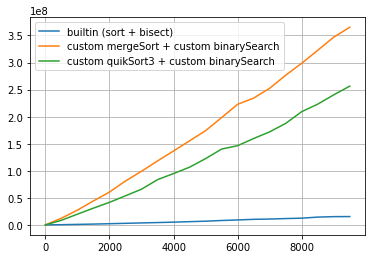

In [15]:
from matplotlib import pyplot as plt
import time, random, string

def timed(f, *args, n_iter=100):
    acc = float('inf')
    for i in range(n_iter):
        t0 = time.perf_counter_ns()
        f(*args)
        t1 = time.perf_counter_ns()
        acc = min(acc, t1 - t0)
    return acc


N, step = 10000, 500

args = [inputs(x, x) for x in range(0, N, step)] # аргументы
xs = list(range(0, N, step))                     # подписи
plt.plot(xs, [timed(builtinCLines, x, y, n_iter=10) for (x, y) in args], label="builtin (sort + bisect)")
plt.plot(xs, [timed(mergeCLines, x, y, n_iter=10) for (x, y) in args], label="custom mergeSort + custom binarySearch")
plt.plot(xs, [timed(quickCLines, x, y, n_iter=10) for (x, y) in args], label="custom quikSort3 + custom binarySearch")
plt.legend()
plt.grid(True)
plt.show()

# Порядковая статистика (частный случай быстрой сортировки)

k-я порядковая статистика неупорядоченного массив A[1. . .n] - k-й элемент упорядоченного по неубыванию массива (то естьA′[k])
То есть, 1-я порядковая статистика - минимальный эл-т, n-я статистика - максимум. n/2 - медиана
Другими словами - k-й наименьший элемент в НЕупорядоченном массиве.

Функция RandomSelect(A, ℓ,r,k)  
если ℓ≥r: вернуть A[ℓ]  
выбрать случайный элемент x из A[ℓ . . .r]
разбить A[ℓ . . .r] на 
	A[ℓ . . .m1], A[m1+1. . .m2], A[m2+1. . .r]
	(<x,=x,>x соответственно)
если ℓ≤k≤m1:
	вернуть RandomSelect(A, ℓ,m1,k)
иначе если m1+1≤k≤m2:
	вернуть x 
иначе:
	вернуть RandomSelect(A,m2+1,r,k)

Работает O(n)

In [16]:
def randomSelect(A, l, r, k):
    assert (k >= l) and (k <= r)
    
    if l >= r:
        return A[l]
    x = pivot(A, l, r) 
    m1, m2 = partBentley(A, l, r)
    
    if k <= m1:
        return randomSelect(A, l, m1, k)
    elif (m1 + 1 <= k) and (k <= m2):
        return x
    else:
        return randomSelect(A, m2 + 1, r, k)


w, n = 10, 20
L = [random.randint(0, w) for _ in range(n)]

[randomSelect(L, 0, len(L) - 1, k) == sorted(L)[k] for k in range(len(L))]


[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]


Теоретическая задача для самостоятельной проверки: искать медиану сложнее всего

Предположим, что в нашем распоряжении есть алгоритм, который за линейное время находит медиану массива. Алгоритм не изменяет массив и выдает индекс ячейки исходного массива, в которой стоит медиана. Покажите, как использовать этот алгоритм, чтобы за линейное же время найти любую заданную порядковую статистику массива.


Александр Васильев:

1) За один проход по массиву найдём его максимум и минимум. Это займёт линейное время.  
2) В зависимости от того, больше или меньше искомая статистика медианы, рассчитаем количество элементов, которые надо добавить справа или слева от массива, чтобы искомая статистика стала медианой получившегося массива.  
2.1) Если k > медианы, то 2k = n + r и r = 2k - n  
2.2) Если k < медианы, то 2(k + l) = n и l = n/2 - k  
2.3) Если k -- это медиана, то дальше делать ничего не надо, мы потратили линейное время.  
второй шаг занимает константное время  
3) дописываем либо r элементов справа от массива, один за другим, либо l элементов слева от него. Оценим сверху эту операцию  линейным временем от размера массива.  
4) находим медиану в новом массиве, это занимает линейное время.  
5) вычисляем позицию найденного элемента в исходном массиве, это занимает константное время.  
итого: пять шагов делаются за линейное время.  

